# Demo 3


In [20]:
import sys
import os

# Manually set the path relative to the py file's location that you want to import
func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../'))
# Add the path to sys.path
sys.path.append(func_lib_path)
# Now you can import func_lib
import func_lib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Calculate accuracy, precision, and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [21]:
#  Create a variable named 'historical_prices' to store historical price data between the dates'2005-01-01' and '2015-01-01'. Use the function 'create_hist_prices()' from 'func_lib' to generate or retrieve the historical prices.
historical_prices = func_lib.create_hist_prices()
# Create a list named 'list_of_momentums' and add 1 to the list
list_of_momentums = [1]
# Compute the total returns using the historical prices and the list of momentums. Use the 'compute_returns()' function from 'func_lib'. Pass 'historical_prices' and 'list_of_momentums' as arguments to 'func_lib.compute_returns()'.
# - Store the result in a variable named 'total_returns'.
total_returns     = func_lib.compute_returns(historical_prices, list_of_momentums)
# Use the 'dropna()' method on the 'total_returns' DataFrame.
total_returns.dropna(inplace=True)

[*********************100%***********************]  501 of 501 completed

133 Failed downloads:
['SW']: YFPricesMissingError('possibly delisted; no price data found  (1d 2000-01-01 -> 2024-05-01) (Yahoo error = "Data doesn\'t exist for startDate = 946702800, endDate = 1714536000")')
['LEN', 'EIX', 'CMG', 'CEG', 'L', 'BK', 'ERIE', 'WSM']: ConnectionError('Failed to perform, curl: (7) Failed to connect to query2.finance.yahoo.com port 443 after 43 ms: Could not connect to server. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
['MPC', 'PODD', 'GILD', 'ALGN', 'BXP', 'PYPL']: ConnectionError('Failed to perform, curl: (7) Failed to connect to query2.finance.yahoo.com port 443 after 40 ms: Could not connect to server. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')
['BX', 'FFIV', 'BEN', 'CVX', 'LII', 'XOM', 'MTB', 'GRMN', 'ADBE', 'VRSN']: ConnectionError('Failed to perform, curl: (7) Failed to connect to query2.finance.yahoo.com port 44

In [22]:
total_returns.index.get_level_values('Ticker').nunique()

367

In [23]:
tickers_per_date = total_returns.index.get_level_values('Date').value_counts()
tickers_per_date

Date
2024-03-11    367
2024-02-27    367
2024-01-31    367
2024-03-20    367
2024-04-29    367
             ... 
2000-01-14    256
2000-01-19    256
2000-01-06    256
2000-01-05    256
2000-01-04    256
Name: count, Length: 6118, dtype: int64

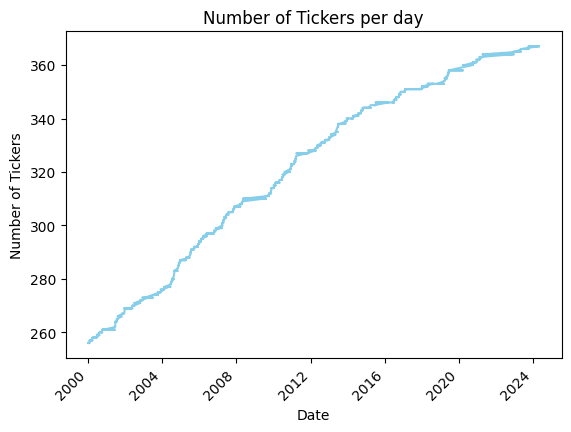

In [24]:
import matplotlib.pyplot as plt
tickers_per_date.plot(kind='line', color='skyblue')
plt.title('Number of Tickers per day')
plt.xlabel('Date')
plt.ylabel('Number of Tickers')
plt.xticks(rotation=45)
plt.show()

In [25]:
pd.options.display.float_format = "{:,.4f}".format

total_returns.describe()

,F_1_d_returns,1_d_returns
count,"1,970,476.0000","1,970,476.0000"
mean,0.0007,0.0007
std,0.0233,0.0233
min,-0.6805,-0.6805
25%,-0.0090,-0.0090
50%,0.0006,0.0006
75%,0.0102,0.0102
max,1.0236,1.0236


In [26]:
0.0007 * 252

0.1764

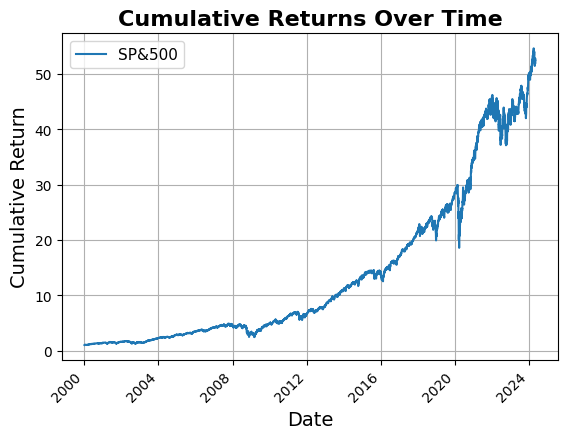

The CAGR is: 17.62%
Sharpe Ratio of Strategy: 0.9


<Axes: xlabel='Date'>

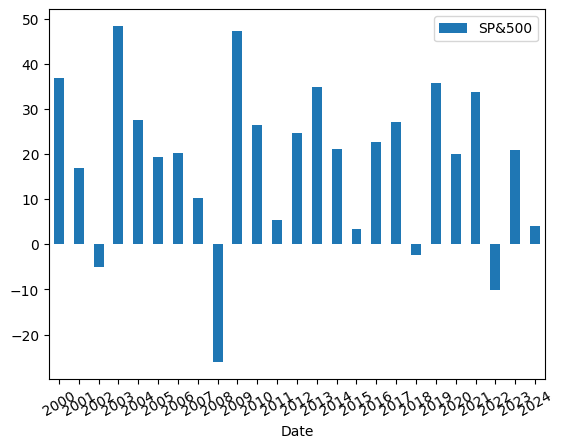

In [27]:
# def compute_BM_Perf(total_returns):
#     # Compute the daily mean of all stocks. This will be our equal weighted benchmark

#     return cum_returns, calendar_returns
    
    
daily_mean  = pd.DataFrame(total_returns.loc[:,'F_1_d_returns'].groupby(level='Date').mean())
daily_mean.rename(columns={'F_1_d_returns':'SP&500'}, inplace=True)

# Convert daily returns to cumulative returns
cum_returns = pd.DataFrame((daily_mean[['SP&500']]+1).cumprod())

# Plotting the cumulative returns
cum_returns.plot()

# Customizing the plot
plt.title('Cumulative Returns Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title_fontsize='13', fontsize='11')

# Display the plot
plt.show()

# Calculate the number of years in the dataset
number_of_years = len(daily_mean) / 252  # Assuming 252 trading days in a year

ending_value    = cum_returns['SP&500'].iloc[-1]
beginning_value = cum_returns['SP&500'].iloc[1]

# Compute the Compound Annual Growth Rate (CAGR)
ratio = ending_value/beginning_value
cagr = round((ratio**(1/number_of_years)-1)*100,2)
print(f'The CAGR is: {cagr}%')

# Compute the Sharpe Ratio by annualizing the daily mean and the daily std
average_daily_return    = daily_mean[['SP&500']].describe().iloc[1,:] * 252
stand_dev_dail_return   = daily_mean[['SP&500']].describe().iloc[2,:] * pow(252,1/2)

sharpe  = average_daily_return/stand_dev_dail_return

print(f'Sharpe Ratio of Strategy: {round(sharpe.iloc[0],2)}')


#df_daily_mean.rename(columns={target:'Strategy'},inplace=True)
ann_returns = (pd.DataFrame((daily_mean[['SP&500']]+1).groupby(daily_mean.index.get_level_values(0).year).cumprod())-1)*100
calendar_returns  = pd.DataFrame(ann_returns['SP&500'].groupby(daily_mean.index.get_level_values(0).year).last())

calendar_returns.plot.bar(rot=30,  legend='top_left')#.opts(multi_level=False) 